# Inferenza statistica e machine learning in fisica statistica: il problema di Ising inverso

Import delle librerie necessarie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Lattice

Come prima cosa, proviamo a caricare uno dei file di dati. Carichiamo le configurazioni e i coupling (per calolare poi l'errore) e defininiamo le grandezze di interesse

In [3]:
L = 3 #dimensioni lineari del sistema
N = L*L*L #numero di spin

data = np.loadtxt("./data_lattice/config_L3_T2.00_J1.00.dat")
J0 = np.loadtxt("./data_lattice/interaction_L3_T2.00_J1.00.dat")*0.5 #Lo 0.5 serve per la temperatura

Diamo un'occhiata a come sono fatti i coupling originali J0. Notate che la matrice è simmetrica.

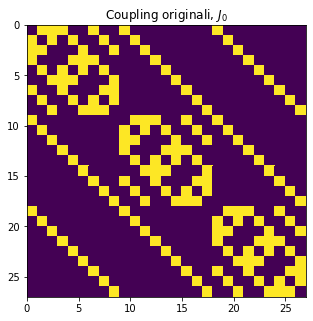

In [4]:
fig, ax = plt.subplots(figsize = (5,5))
plt.gca().invert_yaxis()
heatmap = ax.pcolor(J0)
ax.set_title(r"Coupling originali, $J_0$")
plt.show()

Calcoliamo la matrice di correlazione e prendiamo l'opposto dell'inversa. Il metodo MF ci dice che questa è la nostra stima J dei coupling di interazione.

In [5]:
#Implementazione naive

def MF_J_slow(data, N):
    xmeans = np.mean(np.split(data[:,2], int(len(data)/N)), axis = 0)
    ymeans = np.mean(np.split(data[:,3], int(len(data)/N)), axis = 0)
    C= np.zeros((N,N))
    for el in np.split(data[:,2], int(len(data)/N)):
        C += np.outer(el,el.T)
    for el in np.split(data[:,3], int(len(data)/N)):
        C += np.outer(el,el.T)
    C /= (len(data)/N)
    C -= np.outer(xmeans, xmeans.T)+np.outer(ymeans, ymeans.T)
    J = - np.linalg.inv(C)
    return J

In [6]:
#Implementazione usando 'cov'

def MF_J(data, N):
    C = np.cov(np.split(data[:,2], int(len(data)/N)), rowvar = False) + np.cov(np.split(data[:,3], int(len(data)/N)), rowvar = False)
    J = - np.linalg.inv(C)
    return J

In [7]:
J = MF_J(data, N)

Confrontiamo la matrice ottenuta con l'originale.

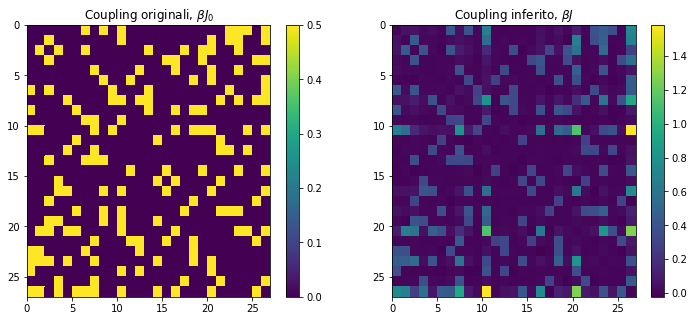

In [12]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].invert_yaxis()
ax[1].invert_yaxis()
heatmap = ax[0].pcolor(J0)
ax[0].set_title(r"Coupling originali, $\beta J_0$")
plt.colorbar(heatmap, ax = ax[0])
heatmap = ax[1].pcolor(J-np.identity(N)*np.diag(J))
plt.colorbar(heatmap,  ax = ax[1])
ax[1].set_title(r"Coupling inferito, $\beta J$")
plt.show()

La matrice così ottenuta ha visivamente la stessa forma della matrice originale. Ottimo!

Calcoliamo gamma per stimare l'errore:

In [25]:
def gamma(J, J0):
    return np.sqrt(np.sum((J-np.identity(N)*np.diag(J)-J0)**2)/np.sum(J0**2))

In [26]:
print("Mean field error = {0:.3}".format(gamma(J, J0)))

Mean field error = 0.261


Come ci potevamo aspettare, l'errore è relativamente piccolo.

Possiamo ora ripetere il processo per gli altri grafici generati, ed ottenere l'andamento dell'errore in funzione della temperatura.

In [27]:
errors = []
print("# Temperatura Gamma")
for file in os.listdir("./data_lattice/"):
    if "config" in file:
        data = np.loadtxt("./data_lattice/" + file)
        J0 = np.loadtxt("./data_lattice/interaction_" + file.split("_",1)[1])/float(file.split("_")[2][1:])
        try:
            J = MF_J(data, N)
            errors += [[float(file.split("_")[2][1:]), gamma(J, J0)]]
            print(file.split("_")[2][1:], gamma(J, J0))
        except:
            print(file.split("_")[2][1:], "Broken")
errors_lattice = np.array(errors)

# Temperatura Gamma
2.00 0.2605648074143807
1.60 0.3854400079770866
3.00 0.47094444142440245
2.80 0.4585557957513255
1.30 1.506021491069586
2.50 0.4293688924967689
1.90 0.19144264657388807
2.20 0.354634627685874
1.40 1.010632721868107
2.70 0.4516513050052763
2.90 0.4669733554279403
2.40 0.41149399864135183
2.10 0.30976623034193196
1.70 0.22182845588143627
2.60 0.44431979075221695
1.80 0.15630915345615912
2.30 0.38703419995265953
1.50 0.6258220581784509


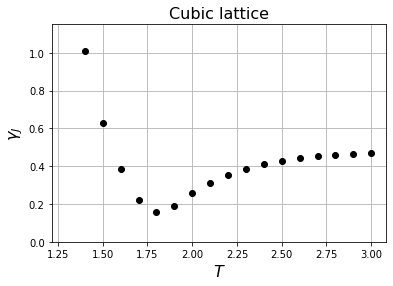

In [28]:
plt.scatter(errors_lattice[:,0], errors_lattice[:,1], zorder = 3, color = "black")
plt.ylim([0,1.15])
plt.ylabel(r"$\gamma_J$", size = 16)
plt.xlabel(r"$T$", size = 16)
plt.title("Cubic lattice", size = 16)
plt.grid()
plt.show()

## Random graph

Possiamo ripetere le operazioni precedenti nel caso di un random graph.

In [9]:
data = np.loadtxt("./data_RG/config_L3_T2.00_J1.00.dat")
J0 = np.loadtxt("./data_RG/interaction_L3_T2.00_J1.00.dat")*0.5

In [10]:
J = MF_J(data, N)

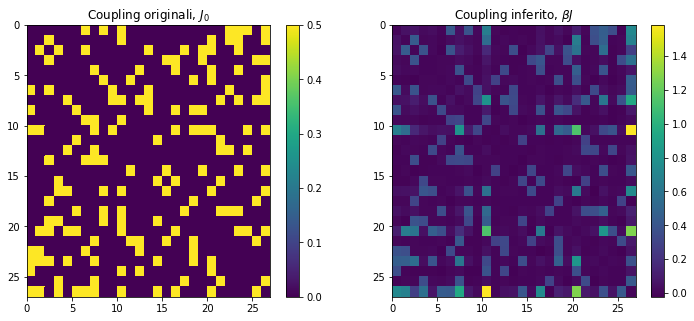

In [11]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].invert_yaxis()
ax[1].invert_yaxis()
heatmap = ax[0].pcolor(J0)
ax[0].set_title(r"Coupling originali, $J_0$")
plt.colorbar(heatmap, ax = ax[0])
heatmap = ax[1].pcolor(J-np.identity(N)*np.diag(J))
plt.colorbar(heatmap,  ax = ax[1])
ax[1].set_title(r"Coupling inferito, $\beta J$")
plt.show()

In [23]:
errors = []
print("# Temperatura Gamma")
for file in os.listdir("./data_RG/"):
    if "config" in file:
        data = np.loadtxt("./data_RG/" + file)
        J0 = np.loadtxt("./data_RG/interaction_" + file.split("_",1)[1])/float(file.split("_")[2][1:])
        try:
            J = MF_J(data, N)
            errors += [[float(file.split("_")[2][1:]), gamma(J, J0)]]
            print(file.split("_")[2][1:], gamma(J, J0))
        except:
            print(file.split("_")[2][1:], "Broken")
errors_RG = np.array(errors)

# Temperatura Gamma
2.00 0.4815337392835571
3.50 0.476635255473725
1.60 3.7477391000148486
3.00 0.45392480661312945
2.80 0.4362658984443205
2.50 0.39173700347666535
1.90 0.8304257084627726
2.20 0.3469756078247049
3.20 0.4629709069403028
2.70 0.4219062576517739
3.10 0.4623371851177087
2.90 0.4461916958360823
2.40 0.37203074208401066
2.10 0.3865099859556248
3.40 0.4734954779619145
1.70 2.007495231383603
3.30 0.4719833493268504
2.60 0.408250043937103
1.80 1.236889927464801
2.30 0.3543805064057084


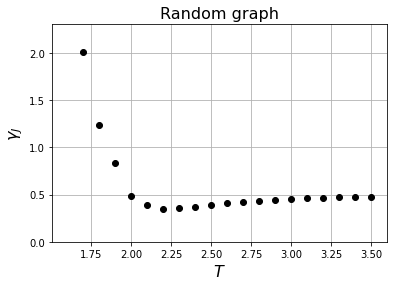

In [26]:
plt.scatter(errors_RG[:,0], errors_RG[:,1], zorder = 3, color = "black")
plt.ylim([0,2.3])
plt.ylabel(r"$\gamma_J$", size = 16)
plt.xlabel(r"$T$", size = 16)
plt.title("Random graph", size = 16)
plt.grid()
plt.show()

Osserviamo che le performance tendono ad essere peggiori.